In [ ]:
# Enable save and load to local machine
from google.colab import files
import io

In [ ]:
# Enable save and load to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import general modules for data processing
import string
import re
import numpy as np
import pandas as pd
print("Succesfully imported necessary modules")

Succesfully imported necessary modules


In [ ]:
pd. __version__

'1.1.5'

In [ ]:
# Install and import SpaCy library for NLP

!pip install -U spacy==3.0        # to force the latest version
import spacy  
!pip install -U pip setuptools wheel

#!python -m pip install --upgrade spacy  # 2.3.5  
print("SpaCy installed and imported successfully")   

     |████████████████████████████████| 12.7MB 273kB/s 
     |████████████████████████████████| 460kB 38.6MB/s 
     |████████████████████████████████| 1.1MB 15.2MB/s 
     |████████████████████████████████| 9.1MB 34.0MB/s 
     |████████████████████████████████| 122kB 41.3MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=694fc04e425d2cc5c1e26a5447c7fe5a5c1dca4b3341fc4325657e5a717d44d2
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: smart-open 4.2.0
    Uninstalling smart-open-4.2.0:
      Successfully uninstalled smart-open-4.2.0
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    U

In [ ]:
# Download and load German language model
# '...sm' = small, '...md' = medium, '...lg' = large language model

!python -m spacy download de_core_news_lg  
import de_core_news_lg
print("SpaCy language model imported successfully")    

2021-04-08 05:41:53.498066: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 573.0 MB 2.5 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')
SpaCy language model imported successfully


In [ ]:
# Implement the language model

nlp = de_core_news_lg.load()         # Alternative: nlp = spacy.load('de_core_news_lg')     
print("SpaCy language model implemented successfully")

SpaCy language model implemented successfully


In [ ]:
spacy.info()

{'location': '/usr/local/lib/python3.7/dist-packages/spacy',
 'pipelines': {},
 'platform': 'Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic',
 'python_version': '3.7.10',
 'spacy_version': '3.0.0'}

In [ ]:
# load corpus file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_unprocessed.csv'
with open(infile, 'r') as f:            # rb opens file for reading in binary mode
            corpus = pd.read_csv(f, encoding="UTF-8")
corpus

,fulltext_path,e_rara_id,fulltext
0,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,14432690,Abschiedslieder der »ach dem Staat Missouri in...
1,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,1757509,"«MMW. ""NA M^'!^ - M MW MZM s^ nWWüiKiKWWM MMWM..."
2,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,1397203,"SM\n\nAdrettenbuch der Republik Hern, für Wiss..."
3,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,9119958,MM\n\nDas alle kiel und seine Umgebung rze^zes...
4,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,23306869,>2 « !>>-\n\n« i j ?! i;\n\n3>ie AlimMk i>n S...
...,...,...,...
171,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,5713424,'izt !v . ^ / >.E 'M -E B MM IsE. WWW -rp^- '-...
172,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,11424209,Theol XXIV 45 7\n\nSIS iSe**:??* jn^-Æite^ : ;...
173,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,10179500,MWU M»2\n\ncnlisrjlrl' Diüstrrl^irn. erNUSgege...
174,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,1758267,Sammlung Lee rabschriften der gegenwärtigen Be...


### Basic fulltext cleaning 

In [ ]:
# VERWORFEN
# Remove special characters and symbols, EXCLUDING diacritics
# optionally also remove numbers and/or sentence endings

def remove_special_chars(text, remove_digits=False, remove_sent_ends=False):
    '''
    Function to remove special characters, numbers and splitlines, but keep diacritic characters.
    See https://www.codetable.net/
    To remove numbers also, set argument 'remove_digits = True'.
    To remove sentence endings (points) also set argument 'remove_sent_ends = True'.
    '''
    if remove_sent_ends:
      pattern = r'[^a-zA-Z0-9\x7f-\xff\s]' if not remove_digits else r'[^a-zA-Z\x7f-\xff\s]'
    else:
      pattern = r'[^a-zA-Z0-9.\x7f-\xff\s]' if not remove_digits else r'[^a-zA-Z.\x7f-\xff\s]'
    text = re.sub(pattern, '', text).splitlines()
    text = ''.join(text)              # get rid of line splits
    text = ' '.join(text.split())     # get rid of extra whitespaces
    return text

In [ ]:
# Preprocess the raw text (remove punctuation)
import nltk
nltk.download('punkt')     # "Punkt" = standard classifier for sentence segmentation   
from nltk import word_tokenize   

print("Succesfully imported necessary modules")

def remove_punctuation(wordlist):
    punctuation = [',', ';', ':', '(', ')', '[', ']', '{', '}', '\"', '\'','\'\'', '\`', '\`\`', '\-', '«', '»', '£', '\^', '~', '*', '®', '•', '■', '♦', '§']
    wordlist_stripped = [w for w in wordlist if w not in punctuation]
    wordlist_stripped = [w for w in wordlist if len(w) > 2]
    return wordlist_stripped

def preprocess_nltk(text):
    wordlist = nltk.word_tokenize(text, language='german')
    wordlist = remove_punctuation(wordlist)
    wordlist = ' '.join(wordlist)
    return wordlist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Succesfully imported necessary modules


In [ ]:
corpus['clean_text'] = ''
for index in corpus.index:
    clean_text = preprocess_nltk(corpus['fulltext'][index])
    corpus['clean_text'][index] = clean_text
    
corpus.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<bound method NDFrame.head of                                          fulltext_path  ...                                         clean_text
0    drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  Abschiedslieder der ach dem Staat Missouri Nor...
1    drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  MMW MZM nWWüiKiKWWM MMWMM S-iWEsW '^X *'L MDW ...
2    drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  Adrettenbuch der Republik Hern für Wissenschaf...
3    drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  Das alle kiel und seine Umgebung rze^zesrzesne...
4    drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  AlimMk Stadt §km und die von iHr benutzten woh...
..                                                 ...  ...                                                ...
171  drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  'izt IsE WWW -rp^- '-k-d.M -chiÄMK- ZMM L-2G D...
172  drive/My Drive/e_rara_fulltexts/bernensia/ger/...  ...  Theol XXIV SIS iSe** 

In [ ]:
corpus.fulltext[133]

'Dir /> Versumpfung des Gebiets der Juragenmjser durch die Lussüstrun^ des Planes des Herrn eidsi. obersten Ln Aicca, zu lthur, non 1803, und die Lntsumpfung dieses Kebietes von General Ochsenbein, Mftgli-d der ökonomische» Gesellschaft de» Kantons Bern, und Aktionär der Gesellschaft sllr Korrektion der Juragewisser, zu B-llevue bei Bi-l. Motto:  On a cdsrclrü Midi n  -r- \'\'V? I ^ 7 ^ - - ^ -A ^;K tzU M »r.^I..<- v- . i - < t \' \' ^ ? . i < ) tKk\'r\'r^) K-K ^LjkAH-p> .^S-e\n\nDen löblichen Regierungen der fünf bei der Lorrektion der Iuragewässer beseitigten Ztantone Bern, Freibur^ Salothurn, Wandt und Neuenbnrg, und der Tit. ökonomischen Gesellschaft des Kantons Been hochachtungsvoll gewidmet l\'om Verfasser.\n\nMMW > U,N WD W!W N M\n\nVorwort. Wie tief sollen die Juragewässer gesenkt werden, um den, für die Landwirthschaft, beabsichtigten Zweck wirklich zu erreichen? In dieser Frage liegt der Kern eines rationellen Ent- sumpfungs- und Correktionsplancs. Ohne darüber durchaus im Kl

In [ ]:
corpus.clean_text[133]

"Dir Versumpfung des Gebiets der Juragenmjser durch die Lussüstrun^ des Planes des Herrn eidsi obersten Aicca lthur non 1803 und die Lntsumpfung dieses Kebietes von General Ochsenbein Mftgli-d der ökonomische Gesellschaft Kantons Bern und Aktionär der Gesellschaft sllr Korrektion der Juragewisser B-llevue bei Bi-l Motto cdsrclrü Midi -r- ''V tzU r.^I.. tKk'r'r^ K-K ^LjkAH-p .^S-e Den löblichen Regierungen der fünf bei der Lorrektion der Iuragewässer beseitigten Ztantone Bern Freibur^ Salothurn Wandt und Neuenbnrg und der Tit ökonomischen Gesellschaft des Kantons Been hochachtungsvoll gewidmet l'om Verfasser MMW Vorwort Wie tief sollen die Juragewässer gesenkt werden den für die Landwirthschaft beabsichtigten Zweck wirklich erreichen dieser Frage liegt der Kern eines rationellen Ent- sumpfungs- und Correktionsplancs Ohne darüber durchaus Klaren sein läuft man Gefahr entweder daß die Senkung der Gewässer der Landwirthschaft nicht genügt oder daß man eine größere Senkung vornimmt als noth

In [ ]:
text = nlp(corpus['clean_text'][147])

In [ ]:
[print(s) for s in text.sents]

PllWß und Große Räche der Stadt und Reß
publik
Bern entbieten allen und jeden Unsern lieben und getreuen Bürgern und Angehörigen Stadt und Land Unsern gnädigen und wohlgeneigten Willen und geben ihnen dabey vernehmen
Demnach
Uns die Ungleichheit vorgestellt worden welche Unsern deutschen Landen bey Verschreibung des Zinses Kaufbriefen und andern das Unterpfandsrecht mit sich führenden Instrumenten beobachtet wird die einten sich hierbey nach dem Inhalt der Satzung des XVI Tit des Theils die andern aber nach Ausweis der Satzung des XXV Tit des Theils der erneuerten Gerichtssatzung verhalten und Wir dabey den großen Nachtheil und Schaden landesvä- terlich beherziget vielen Unserer lieben und geteuen Angehörigen dadurch zufließen dörfte haben Wir Abänderung der obangeregten Satz sowohl für das Vergangene als das Zukünftige erkennt und verordnet
Daß äußert dem Gültbrief deßenthalb Wir bey denen darauf sich beziehenden Satzungen bewenden lassen sonsten alle mögliche bereits aufgerichtete un

[None, None, None, None, None, None, None, None, None, None]

### SpaCy large german model (de_core_news_lg) NER

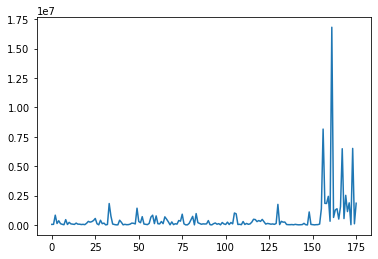

In [ ]:
text_lengths = [len(corpus['clean_text'][index]) for index in corpus.index]
text_lengths = pd.Series(text_lengths)
text_lengths.plot()

In [ ]:
corpus['clean_text_length'] = ''
for index in corpus.index:
    corpus['clean_text_length'][index] = len(corpus['clean_text'][index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
corpus.sort_values('clean_text_length', ascending=False)

,fulltext_path,e_rara_id,fulltext,clean_text,clean_text_length
161,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,14098040,"mm\n\ntiMÄlI 'Äii, ' 1 ‘- %&£ -v t; JsälSfe:'....",tiMÄlI 'Äii JsälSfe '.. m-'* r^iv *£■ AVri r.^...,16820451
156,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,20004520,mm i«»Ä^#® 7 « £Ä£&i£§»sä ■. -w-*ftn««*»s W ^ ...,£Ä£ i£§ -w-*ftn W-gl .JPaä rancfe inQJ rj'fi M...,8156090
173,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,10179500,MWU M»2\n\ncnlisrjlrl' Diüstrrl^irn. erNUSgege...,MWU cnlisrjlrl Diüstrrl^irn erNUSgegeben von d...,6512247
167,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,22194398,"Mr' «»r«S M.M MWs. SEW"" > ^4SV»i»' -^' .tG -MM...",M.M MWs SEW ^4SV .tG -MM MÄW EWi ^cheB8A SM^-L...,6484607
169,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,21594207,9 ..^ VV- Jt \4& C /.\n\nSer Kerner Kotter ' -...,..^ VV- Ser Kerner Kotter -r- Set legte Sortra...,2520017
...,...,...,...,...,...
151,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,7312724,Zur Reorganisation der Knrgergemeinde. Bei den...,Zur Reorganisation der Knrgergemeinde Bei den ...,6866
77,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,6800528,Filßrilk^kion für die Forst-Kommißion der Stad...,Filßrilk^kion für die Forst-Kommißion der Stad...,6761
92,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,21103894,Lieder auf die Laupcn-Feyer 1824 Ber»/ bey C. ...,Lieder auf die Laupcn-Feyer 1824 Ber bey Jenni...,4845
31,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,22660710,Bundesbeschluß betreffend -ie Juragewäjserkorr...,Bundesbeschluß betreffend -ie Juragewäjserkorr...,3086


In [ ]:
corpus['clean_text'][161][0:100]

"tiMÄlI 'Äii JsälSfe '.. m-'* r^iv *£■ AVri r.^ Zßyt-m Ba^tgü^K* afes v-„- •.•■ gmSm SSE®® ^Jr £v\\ wf"

In [ ]:
from nltk import sent_tokenize
text = nltk.sent_tokenize(corpus['clean_text'][161])

In [ ]:
for i in range(0, corpus['clean_text_length'][161], 1000000):
        text = corpus['clean_text'][index][0:i]
        

In [ ]:
text_lengths = [len(corpus['clean_text'][index]) for index in corpus.index]
print("Maximum length of clean texts in corpus: ", max(text_lengths), " characters")
if max(text_lengths) > 1000000:
    nlp.max_length = max(text_lengths) + 1
    print('nlp.max_length increased to {} due to max text length to process.'.format(max(text_lengths) + 1))

Maximum length of clean texts in corpus:  16820451  characters
nlp.max_length increased to 16820452 due to max text length to process.


In [ ]:
# Applying large Spacy german model on clean_text and export LOC tags
from nltk import sent_tokenize
for index in corpus.index[158:176]:      
    text = nltk.sent_tokenize(corpus['clean_text'][index])
    for s in text:
        doc = nlp(s)
        %cd /content/drive/My\ Drive/e_rara_iob/bernensia/spacy
        id = corpus['e_rara_id'][index]
        outfile = "./spacy_iob_" + str(id) + ".txt"
        with open(outfile, "a") as f:
            for token in doc:
                if token.ent_type_=='LOC':
                    f.write(str([token.i, token.text, token.ent_iob_, token.ent_type_]))
        %cd /content/


In [ ]:
# Applying large Spacy german model on clean_text and write LOC entities per clean text
from nltk import sent_tokenize

corpus['spacy'] = ''
for index in corpus.index:
    loc_ents = []      
    sentences = nltk.sent_tokenize(corpus['clean_text'][index], language='german')
    for s in sentences:
        doc = nlp(s)
        loc_ents.append([ent.text for ent in doc.ents if ent.label_ == 'LOC'])
    corpus['spacy'][index] = loc_ents


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### Small Sample

In [ ]:
test = 'Ansieht von viel von Büöen. Flach einer 3eicbnung aus der Kieler Lkronik des Verresius, 162b. Das alle viel und seine Umgebung. Erläuternder Text lMLi von Dr. ß. Türler, Staatsarcbivar in Bern. Einleitung. ^)as alte Biel und seine Umgebung“ soll eine Beimatkunöe in Bildern für dos gange Seelanö sein. Es ist gewidmet seinen Bewohnern und seinen freunden, jedem, dessen Wiege in einer der alt- ehrwürdigen Ortschaften stand, jedem, dem das Land zur neuen Beimat geworden ist, oder der es um seiner Vorzüge willen lieh gewonnen hat. Heue Zeiten haDer Name und das Nller der Orlsckafl viel. 4 » bisherigen Versuche, hie Etymologie des T Ortsnamens ßiel herzustellen, sind alle wertlos. Sie mutzten alle zu verkehrten ^  Resultaten führen, weil nicht die ältesten Bamensformen, sondern nur die heutige Form zur Grundlage der Untersuchung gemacht wurden. Sowohl die Erklärung des Verresius in seiner Bieler- Lhronik aus dem lateinischen Bipennae ----- Seil, als auch die neuestens von Dr. Zimmerli (Sprachgrenze etc.) wiederholte Ableitung von Bühl, als endlich die im geographischen Lexikon von Attinger durch Abbe Daucourt ausgestellte ßerleitung vorn gallischen buwil = Beil sind unhaltbar. Die älteste 1142 vorkommende Bamensform Belna ist identisch mit der mittelalterlichen Schreibung des Ortsnamens Beaune (im Coiret, Frankreich), und da als Etymon des letztem Damens Belena, Belenus, der Dame eines keltischen Gottes, festgestellt ist, liegt die Vermutung nahe, dieses auch für den ersten Ortsnamen anzunehmen. Die philologische Untersuchung des ßerrn Dr. Josef Stadelmann, Bibliothekar in Freiburg, bestätigte diese Vermutung des Verfassers genau. Die ältesten romanischen Damensformen für Biel sind: Belna 1142, Bielne 1184, Biene 1218, Beene 1225, Beenna 1233, Biena 1251, Bienna 1260. Sämtliche Glieder dieser Reibe, schreibt ßerr Stadelmann, führen unabweisbar auf die romanische Grundform Beelna zurück und diese seihst mutz zurückgehen auf die vulgärlateinische Form Belena. Damit steht man vor dem keltischen Götternamen Belenus, Belinus. Dieser Gott wurde in verschiedenen keltischen Ländern verehrt, so auch in Gallien. Er war der Bauptgott in Dorikum (Österreich bis Brain). In Aquileja bat man nickt weniger als 22 Inschriften zu seinen Ehren gefunden, wovon 6 seinen Damen als Beinamen des Apollo tragen, dessen Stelle er hei den selten wirklick vertrat. Zwei jener ln- sckriften sind für uns besonders interessant, weil sie uns melden, datz dem Belenus ein Brunnen geweiht war und sick daraus eine direkte Beziehung zu Biel ergiebt. In der Grotte der Brunnenquelle, die sick unmittelbar hinter der Stadt Biel befindet, fand man nämlick im Jahre 1846 nicht weniger als 300 — 400 Kupfermünzen römiscker Baiser, von Julius Eaesar bis Valentinian 1 (4 375). Dieser denkwürdige LDünzfund ist, wie A. John betont bat, ein neuer Beleg für die bekannte heidnische Sitte des Geldspendens an bedeutende Quellen; sie vergegenwärtigt uns ferner die Dauer der römischen Berrsckaft in ßelvetien bis zu deren Verfall und verrät uns endlich die ersten sickern Spuren römiscker Ansiedlung in der nächsten Umgebung, da diese Opferspenden als Gaben des Überflusses von Anwohnern ersckeinen. Wir geben noch einen Schritt weiter, indem wir aus dem Damen Belena erkennen, datz die Quelle dem Belenus geweiht war und die nahe romiscke Ansiedlung hinwiederum den Damen vorn Gatte der Quelle erhalten hat. Auf die hesprockene romaniscke Damensform, die sckon im 13. Jahrhundert zur heutigen Form Bienne geworden ist, gebt auch der deutsche Dame Biel zurück. Die ältesten alamanniscken Sckreihungen sind: de Beine 1160, de Bielno 1179, Bielle 1254, Bein 1259 (auf dem Stadtsiegel), Bieln 1260, Biel 1260, in Biello 1265. Die Alamannen haben wahrscheinlich den Damen übernommen, als im CDunöe der Belveto-Romanen das e der ersten Silbe sckon Doppellaut angenommen hatte. Aus Beelna entstand zunächst Beine, dann, durch Spaltung des e zu ie, Bielna. Der Endvokal a wurde abgeworfen, indem der Dame als Deutrum behandelt und dekliniert wurde, und endlick verlor sick auck das sckwerfällige Scklutz-n. Aus dieser Etymologie ergiebt sick die sckon berührte wicktige latsacke, datz Biel eine romiscke oder romisck-helvetiscke Ansiedlung war und der Dame die Stürme der Völkerwanderung überdauerte, indem ihn die einwandernden Alamannen übernahmen. Jedenfalls darf man aber dabei nur an einen Weiler oder ein Dörfcken des Damens Belna denken; denn die Behauptung, Biel habe sick aus der römiscken Zeit her als selhstständige LDunicipalstadt erhalten, ist von Dr. J. Erni in seiner Dissertation gründlich widerlegt worden. SB 2'

In [ ]:
test = 'Ansieht von viel von Büöen. Flach einer 3eicbnung aus der Kieler Lkronik des Verresius, 162b. Das alle viel und seine Umgebung. Erläuternder Text lMLi von Dr. ß. Türler, Staatsarcbivar in Bern. Einleitung. ^)as alte Biel und seine Umgebung“ soll eine Beimatkunöe in Bildern für dos gange Seelanö sein. Es ist gewidmet seinen Bewohnern und seinen freunden, jedem, dessen Wiege in einer der alt- ehrwürdigen Ortschaften stand, jedem, dem das Land zur neuen Beimat geworden ist, oder der es um seiner Vorzüge willen lieh gewonnen hat. Heue Zeiten haben neue forderungen und Rufgaben gebracht, und das Rite stürzt in Ruinen. Die Stäöte haben beinahe durchweg die engen segeln gesprengt, die ihnen die Ringmauern umgelegt hatten. Über die ehemaligen Stadtgräben * hinaus dehnen sich die (Zassen aus. Rber auch in den Dörfern fordert der fortschritt gar oft den Ruin des Riten, das seine Verteidiger verloren hat. Es ist hohe Zeit, die Denkmäler aus den Zeiten der Voreltern noch im Bilde durch den Stift des Künstlers festzuhalten, die alten Bilder zu sammeln und den Enkeln zu überliefern. Der größte Raum in diesem Werke, das leicht auf die doppelte oder dreifache OröHe hätte gebracht werden können, kommt der Stadt Biel zu wegen ihrer grötzern Rus- dehnung und Bedeutung. Wenn dieses Verhältnis auch im Texte besteht, so geschieht es deswegen, weil Biel ein reichhaltiges Rrchiv besitzt und der Verfasser dasselbe besser als andere kennt. .A. /U : [■’> ( ! Der Name und das Nller der Orlsckafl viel. 4 » bisherigen Versuche, hie Etymologie des T Ortsnamens ßiel herzustellen, sind alle wertlos. Sie mutzten alle zu verkehrten ^  Resultaten führen, weil nicht die ältesten Bamensformen, sondern nur die heutige Form zur Grundlage der Untersuchung gemacht wurden. Sowohl die Erklärung des Verresius in seiner Bieler- Lhronik aus dem lateinischen Bipennae ----- Seil, als auch die neuestens von Dr. Zimmerli (Sprachgrenze etc.) wiederholte Ableitung von Bühl, als endlich die im geographischen Lexikon von Attinger durch Abbe Daucourt ausgestellte ßerleitung vorn gallischen buwil = Beil sind unhaltbar. Die älteste 1142 vorkommende Bamensform Belna ist identisch mit der mittelalterlichen Schreibung des Ortsnamens Beaune (im Coiret, Frankreich), und da als Etymon des letztem Damens Belena, Belenus, der Dame eines keltischen Gottes, festgestellt ist, liegt die Vermutung nahe, dieses auch für den ersten Ortsnamen anzunehmen. Die philologische Untersuchung des ßerrn Dr. Josef Stadelmann, Bibliothekar in Freiburg, bestätigte diese Vermutung des Verfassers genau. Die ältesten romanischen Damensformen für Biel sind: Belna 1142, Bielne 1184, Biene 1218, Beene 1225, Beenna 1233, Biena 1251, Bienna 1260. Sämtliche Glieder dieser Reibe, schreibt ßerr Stadelmann, führen unabweisbar auf die romanische Grundform Beelna zurück und diese seihst mutz zurückgehen auf die vulgärlateinische Form Belena. Damit steht man vor dem keltischen Götternamen Belenus, Belinus. Dieser Gott wurde in verschiedenen keltischen Ländern verehrt, so auch in Gallien. Er war der Bauptgott in Dorikum (Österreich bis Brain). In Aquileja bat man nickt weniger als 22 Inschriften zu seinen Ehren gefunden, wovon 6 seinen Damen als Beinamen des Apollo tragen, dessen Stelle er hei den selten wirklick vertrat. Zwei jener ln- sckriften sind für uns besonders interessant, weil sie uns melden, datz dem Belenus ein Brunnen geweiht war und sick daraus eine direkte Beziehung zu Biel ergiebt. In der Grotte der Brunnenquelle, die sick unmittelbar hinter der Stadt Biel befindet, fand man nämlick im Jahre 1846 nicht weniger als 300 — 400 Kupfermünzen römiscker Baiser, von Julius Eaesar bis Valentinian 1 (4 375). Dieser denkwürdige LDünzfund ist, wie A. John betont bat, ein neuer Beleg für die bekannte heidnische Sitte des Geldspendens an bedeutende Quellen; sie vergegenwärtigt uns ferner die Dauer der römischen Berrsckaft in ßelvetien bis zu deren Verfall und verrät uns endlich die ersten sickern Spuren römiscker Ansiedlung in der nächsten Umgebung, da diese Opferspenden als Gaben des Überflusses von Anwohnern ersckeinen. Wir geben noch einen Schritt weiter, indem wir aus dem Damen Belena erkennen, datz die Quelle dem Belenus geweiht war und die nahe romiscke Ansiedlung hinwiederum den Damen vorn Gatte der Quelle erhalten hat. Auf die hesprockene romaniscke Damensform, die sckon im 13. Jahrhundert zur heutigen Form Bienne geworden ist, gebt auch der deutsche Dame Biel zurück. Die ältesten alamanniscken Sckreihungen sind: de Beine 1160, de Bielno 1179, Bielle 1254, Bein 1259 (auf dem Stadtsiegel), Bieln 1260, Biel 1260, in Biello 1265. Die Alamannen haben wahrscheinlich den Damen übernommen, als im CDunöe der Belveto-Romanen das e der ersten Silbe sckon Doppellaut angenommen hatte. Aus Beelna entstand zunächst Beine, dann, durch Spaltung des e zu ie, Bielna. Der Endvokal a wurde abgeworfen, indem der Dame als Deutrum behandelt und dekliniert wurde, und endlick verlor sick auck das sckwerfällige Scklutz-n. Aus dieser Etymologie ergiebt sick die sckon berührte wicktige latsacke, datz Biel eine romiscke oder romisck-helvetiscke Ansiedlung war und der Dame die Stürme der Völkerwanderung überdauerte, indem ihn die einwandernden Alamannen übernahmen. Jedenfalls darf man aber dabei nur an einen Weiler oder ein Dörfcken des Damens Belna denken; denn die Behauptung, Biel habe sick aus der römiscken Zeit her als selhstständige LDunicipalstadt erhalten, ist von Dr. J. Erni in seiner Dissertation gründlich widerlegt worden. SB 2'

In [ ]:
from nltk import sent_tokenize

In [ ]:
sents = nltk.sent_tokenize(preprocess_nltk(test))
for s in sents:
    doc = nlp(s)
    print([[ent.text, ent.label_] for ent in doc.ents if ent.label_ == 'LOC'])

[['Verresius', 'LOC'], ['Biel', 'LOC'], ['Stadtgräben', 'LOC'], ['Zassen', 'LOC'], ['Rber', 'LOC'], ['Stadt', 'LOC'], ['Biel', 'LOC'], ['Biel', 'LOC'], ['Orlsckafl', 'LOC']]
[['Bühl', 'LOC'], ['Belna', 'LOC'], ['Beaune Coiret Frankreich', 'LOC'], ['Freiburg', 'LOC'], ['Biel', 'LOC'], ['Belna', 'LOC'], ['Bielne', 'LOC'], ['Beene', 'LOC'], ['Beenna', 'LOC'], ['Biena', 'LOC'], ['Bienna', 'LOC'], ['Gallien', 'LOC'], ['Bauptgott Dorikum Österreich', 'LOC'], ['Biel', 'LOC'], ['Brunnenquelle', 'LOC'], ['Stadt', 'LOC'], ['Biel', 'LOC']]
[['Dame Biel', 'LOC'], ['Bielno', 'LOC'], ['Bielle', 'LOC'], ['Bieln', 'LOC'], ['Biel', 'LOC'], ['Biello', 'LOC'], ['Beelna', 'LOC'], ['Endvokal', 'LOC'], ['Biel', 'LOC'], ['Biel', 'LOC'], ['LDunicipalstadt', 'LOC']]


In [ ]:
test = 'Die älteste 1142 vorkommende Bamensform Belna ist identisch mit der mittelalterlichen Schreibung des Ortsnamens Beaune (im Coiret, Frankreich), und da als Etymon des letztem Damens Belena, Belenus, der Dame eines keltischen Gottes, festgestellt ist, liegt die Vermutung nahe, dieses auch für den ersten Ortsnamen anzunehmen.'

In [ ]:
doc = nlp(preprocess_nltk(test))
[[ent.text, ent.label_] for ent in doc.ents if ent.label_ == 'LOC']

[['Belna', 'LOC'], ['Beaune Coiret Frankreich', 'LOC']]

In [ ]:
corpus[101: 176]

,fulltext_path,e_rara_id,fulltext,clean_text,clean_text_length,spacy
101,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,23737732,"Die Verbreitung, Ursachen, Wirkungen und Folge...",Die Verbreitung Ursachen Wirkungen und Folgen ...,236842,"[[Stadt, Bern, Stadt, Bern, Inhal, Stadt, Bern..."
102,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,16962119,über die Verhandlungen der am io. November 186...,über die Verhandlungen der November 1863 Lasiu...,35959,"[[Kasino Aern, Melchnau Wäkcrschwänd, Seeland,..."
103,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,23564124,Rechtliches Gutachten der Juristen-Fakultät zu...,Rechtliches Gutachten der Juristen-Fakultät Tü...,207258,"[[Bern, Stadt Bern, Stadt Bern, Bürgerschaft v..."
104,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,23564293,Rechts - Gutachten - der Juristen-Fakultät in ...,Rechts Gutachten der Juristen-Fakultät Zürich ...,92801,"[[Burgergut, Bern, Wern, Stadt Bern, Stadt Ber..."
105,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,23199028,-SS-»\n\nRechtsfreund für den AimlM ein populä...,-SS- Rechtsfreund für den AimlM ein populäres ...,1014930,"[[], [Kanton Bern, Bern], [], [], [], [Genehmi..."
...,...,...,...,...,...,...
171,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,5713424,'izt !v . ^ / >.E 'M -E B MM IsE. WWW -rp^- '-...,'izt IsE WWW -rp^- '-k-d.M -chiÄMK- ZMM L-2G D...,1880996,"[[eidgenössischen Freistaates Seen, Flecken, W..."
172,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,11424209,Theol XXIV 45 7\n\nSIS iSe**:??* jn^-Æite^ : ;...,Theol XXIV SIS iSe** jn^-Æite^ ÄViÄ RECUEIL CA...,19217,"[[Much, Much, Much, Euch, Eu'r, Choeur Buvons,..."
173,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,10179500,MWU M»2\n\ncnlisrjlrl' Diüstrrl^irn. erNUSgege...,MWU cnlisrjlrl Diüstrrl^irn erNUSgegeben von d...,6512247,"[[Kantons Bern, Mlsaus, Kantons Bern, Jura, Be..."
174,drive/My Drive/e_rara_fulltexts/bernensia/ger/...,1758267,Sammlung Lee rabschriften der gegenwärtigen Be...,Sammlung Lee rabschriften der gegenwärtigen Be...,97468,"[[Noai^ou Rosengarten, .bürgerlicher Monumente..."


In [ ]:
# Save corpus dataframe file to local machine and to Google Drive

# local machine
outfile = "./corpus_bernensia_ger_LOC_spacy_text.csv"
with open(outfile, "w", encoding="utf-8") as f:
    corpus.to_csv(f, index=False, columns=['e_rara_id', 'clean_text_length', 'spacy'])
    files.download(outfile)
print("Saved to file to local machine.")

# Google Drive
%cd /content/drive/My\ Drive/e_rara_fulltexts/bernensia
outfile = "./corpus_bernensia_ger_LOC_spacy_text.csv"
with open(outfile, "w") as f:
    corpus.to_csv(f, index=False, columns=['e_rara_id', 'clean_text_length', 'spacy'])
%cd /content/
print("Saved to file to Google Drive.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved to file to local machine.
/content/drive/My Drive/e_rara_fulltexts/bernensia
/content
Saved to file to Google Drive.


In [ ]:
import glob
%cd /content/drive/My\ Drive/e_rara_iob/bernensia/
files = []
for file in glob.glob('spacy/*'):
    files.append(file)
print(len(files))

/content/drive/My Drive/e_rara_iob/bernensia
176


In [ ]:
tokens_loc = []
tokens_lemmata_loc = []
ent_loc = []
ent_lemmata_loc = []
for index in corpus.index[146:147]:
    text = corpus['clean_text'][index]
    doc = nlp(text)
    ent_loc.append([ent.text for ent in doc.ents if ent.label_ == 'LOC'])
    ent_lemmata_loc.append([ent.lemma_ for ent in doc.ents if ent.label_ == 'LOC'])
    tokens_loc.append([token.text for token in doc if token.ent_type_=='LOC'])
    tokens_lemmata_loc.append([token.lemma_ for token in doc if token.ent_type_=='LOC'])


In [ ]:
print(len(tokens_loc[0]))
print(len(set(tokens_loc[0])))
print(len(ent_lemmata_loc[0]))
print(len(set(ent_lemmata_loc[0])))

50
40
42
33


In [ ]:
ent_lemmata_loc

[['Bern',
  'Bern',
  'Mediän Quarto',
  'Bern',
  'Paris',
  'Stadt',
  'Bern',
  'Hotellaube Nr. 230 mot sur Moutarde',
  'Schweiz',
  'France',
  'Berne',
  'Boulangers',
  'Berlin',
  'Naples',
  'Florence',
  'Aosta',
  'Berlin',
  'Florent',
  'Madras',
  'Halsbinden',
  'Menstruen',
  'Blumenstein-Bads',
  'Gurnigel-Wasser',
  'Blumenstein-Bad',
  'Stockhorns',
  'Badhauses',
  'der',
  'Gesundbrunnen',
  'Thun',
  'Bern',
  'Erde',
  'Mond',
  'Erde',
  'Mond',
  'Mond Horizont',
  'Europäer',
  'Frankreich',
  'Frankreich',
  'Frankreich',
  'Italien',
  'Kramgasse',
  'Son Magasin']]

In [ ]:
from collections import Counter   # Counter.keys() equals to list(set()), Counter.values() counts the elements' frequency
Counter(ent_lemmata_loc[0])

Counter({'Aosta': 1,
         'Badhauses': 1,
         'Berlin': 2,
         'Bern': 5,
         'Berne': 1,
         'Blumenstein-Bad': 1,
         'Blumenstein-Bads': 1,
         'Boulangers': 1,
         'Erde': 2,
         'Europäer': 1,
         'Florence': 1,
         'Florent': 1,
         'France': 1,
         'Frankreich': 3,
         'Gesundbrunnen': 1,
         'Gurnigel-Wasser': 1,
         'Halsbinden': 1,
         'Hotellaube Nr. 230 mot sur Moutarde': 1,
         'Italien': 1,
         'Kramgasse': 1,
         'Madras': 1,
         'Mediän Quarto': 1,
         'Menstruen': 1,
         'Mond': 2,
         'Mond Horizont': 1,
         'Naples': 1,
         'Paris': 1,
         'Schweiz': 1,
         'Son Magasin': 1,
         'Stadt': 1,
         'Stockhorns': 1,
         'Thun': 1,
         'der': 1})

In [ ]:
counter = Counter(ent_lemmata_loc[0])

In [ ]:
counter.most_common(3)

[('Bern', 5), ('Frankreich', 3), ('Berlin', 2)]

In [ ]:
counter.items()

dict_items([('Bern', 5), ('Mediän Quarto', 1), ('Paris', 1), ('Stadt', 1), ('Hotellaube Nr. 230 mot sur Moutarde', 1), ('Schweiz', 1), ('France', 1), ('Berne', 1), ('Boulangers', 1), ('Berlin', 2), ('Naples', 1), ('Florence', 1), ('Aosta', 1), ('Florent', 1), ('Madras', 1), ('Halsbinden', 1), ('Menstruen', 1), ('Blumenstein-Bads', 1), ('Gurnigel-Wasser', 1), ('Blumenstein-Bad', 1), ('Stockhorns', 1), ('Badhauses', 1), ('der', 1), ('Gesundbrunnen', 1), ('Thun', 1), ('Erde', 2), ('Mond', 2), ('Mond Horizont', 1), ('Europäer', 1), ('Frankreich', 3), ('Italien', 1), ('Kramgasse', 1), ('Son Magasin', 1)])

### Post processing: spacy

#### Clean brackets out: spacy

In [ ]:
def remove_brackets_quotes(text):
    brackets = ['[',']', '\'']
    text_clean = [c for c in text if c not in brackets]
    text_clean = ''.join(text_clean)
    return text_clean

In [ ]:
# load LOC file
infile = '/content/drive/My Drive/e_rara_fulltexts/bernensia/corpus_bernensia_ger_LOC_spacy_text.csv'
with open(infile, 'r') as f:            
            state = pd.read_csv(f, encoding="UTF-8")

In [ ]:
state[100:140]

In [ ]:
test = remove_brackets_quotes(state['spacy'][75])
test

In [ ]:
# remove brackets and quotes form LOCs

state['spacy_concat'] = ''
for i in corpus.index:
     clean_text = remove_brackets_quotes(state['spacy'][i])
     state['spacy_concat'][i] = clean_text

In [ ]:
state

In [ ]:
# Google Drive
%cd /content/drive/My\ Drive/e_rara_fulltexts/bernensia
outfile = "./corpus_bernensia_ger_LOC_spacy_text-full.csv"
with open(outfile, "w") as f:
    state.to_csv(f, index=False)
%cd /content/
print("Saved to file to Google Drive.")